In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop
from keras.optimizers import SGD, Adam, RMSprop

In [4]:
##Training data
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"/content/drive/MyDrive/Data/train",target_size=(224,224))
##Validation data
valdata = ImageDataGenerator()
validationdata = valdata.flow_from_directory(directory=r"/content/drive/MyDrive/Data/val", target_size=(224,224))
##Test data
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"/content/drive/MyDrive/Data/test", target_size=(224,224))

Found 4211 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:

## Training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Data/train",
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 4211 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Data/val",
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 3452 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Data/test",
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [9]:
##define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME', input_shape=(224, 224, 3)), ##16 filters, kernel of (3,3), Input image is of size (224, 224, 3)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME'), ##16 filters, kernel of (3,3)
    tf.keras.layers.MaxPooling2D(2,2),    ##maxpooling with kernel size of (2, 2)

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),##32 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),##32 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.MaxPooling2D(2,2),    ##maxpooling with kernel size of (2, 2)

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),##64 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),##64 filters, kernel of (3,3), ReLu Activation
    tf.keras.layers.MaxPooling2D(2,2),    ##maxpooling with kernel size of (2, 2)

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),                  ###Flattening operation
    tf.keras.layers.Dense(1024, activation='relu'),           ##dense layer with 1024 nodes
    tf.keras.layers.Dropout(0.2),                             ##Dropout of 20% neurons
    tf.keras.layers.Dense(512, activation='relu'),           ##dense layer with 512 nodes
    tf.keras.layers.Dropout(0.2),                          ##Dropout of 20% neurons
    tf.keras.layers.Dense(2, activation='softmax')           ##classification layer with  nodes equal to number of classes
])


model.summary()      ##printing summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                   

In [10]:

## Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    traindata,
    epochs=10,
    verbose=1,
    validation_data=validationdata
)


Epoch 1/10
132/132 [==============================] - 1139s 9s/step - loss: 0.3676 - accuracy: 0.8554 - val_loss: 0.3327 - val_accuracy: 0.8462
Epoch 2/10
132/132 [==============================] - 33s 251ms/step - loss: 0.2347 - accuracy: 0.9067 - val_loss: 0.3473 - val_accuracy: 0.8537
Epoch 3/10
132/132 [==============================] - 35s 262ms/step - loss: 0.1550 - accuracy: 0.9378 - val_loss: 0.0914 - val_accuracy: 0.9655
Epoch 4/10
132/132 [==============================] - 35s 269ms/step - loss: 0.1217 - accuracy: 0.9532 - val_loss: 0.1250 - val_accuracy: 0.9481
Epoch 5/10
132/132 [==============================] - 33s 252ms/step - loss: 0.0966 - accuracy: 0.9603 - val_loss: 0.0926 - val_accuracy: 0.9655
Epoch 6/10
132/132 [==============================] - 34s 257ms/step - loss: 0.0836 - accuracy: 0.9675 - val_loss: 0.0600 - val_accuracy: 0.9768
Epoch 7/10
132/132 [==============================] - 34s 256ms/step - loss: 0.0774 - accuracy: 0.9696 - val_loss: 0.0609 - val_acc

<Figure size 640x480 with 0 Axes>

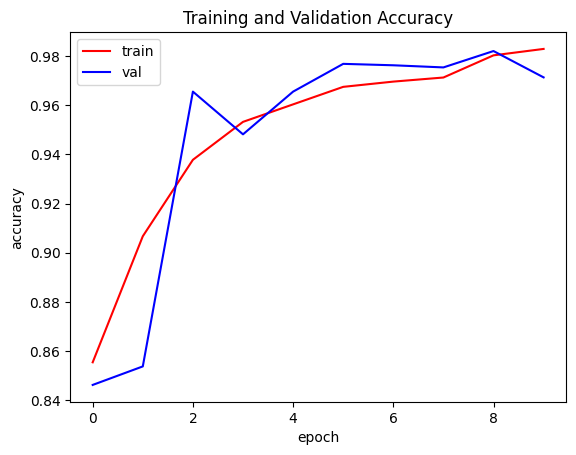

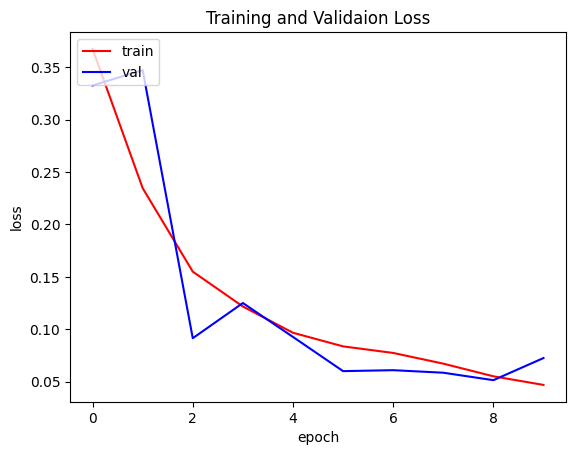

<Figure size 640x480 with 0 Axes>

In [12]:
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.
#here it will plot accuracy and loss curve

#loading libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#storing the string of array related to accuracy and loss (Training and Loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#number of epochs == length of array
epochs = range(len(acc))

#define the title and other information for the plotted graph
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [20]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(testdata)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 3s 144ms/step - loss: 0.7354 - accuracy: 0.7917
Test Accuracy: 0.7916666865348816


In [25]:
##assessment of performance on the test set

##loading libraries
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
print("==============TEST RESULTS============")
from sklearn.metrics import confusion_matrix  ##for printing the confusion matrix
y_pred = model.predict(testdata)      ##predicting the test data set using trained model i.e. model_final
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['normal', 'pneumonia']      ##defining the classes
print(classification_report(testdata.classes, y_pred, target_names=target_names))      ##printing the classification report

==============TEST RESULTS============
20/20 [==============================] - 3s 158ms/step
Confusion Matrix
[[ 50 184]
 [ 64 326]]
Classification Report
              precision    recall  f1-score   support

      normal       0.44      0.21      0.29       234
   pneumonia       0.64      0.84      0.72       390

    accuracy                           0.60       624
   macro avg       0.54      0.52      0.51       624
weighted avg       0.56      0.60      0.56       624



20/20 [==============================] - 3s 148ms/step


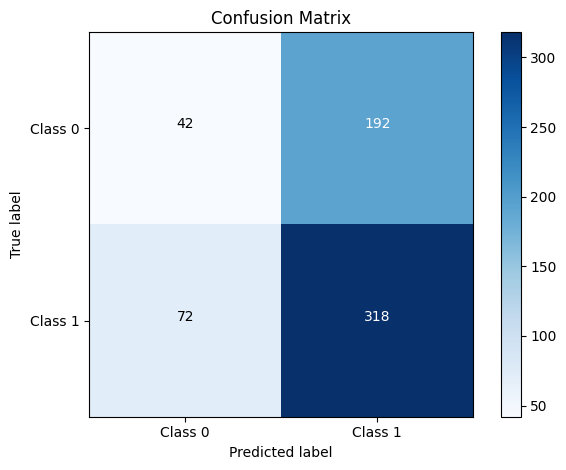

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Assuming testdata is your test dataset

# 1. Make predictions on the test dataset
predictions = model.predict(testdata)
predicted_labels = np.argmax(predictions, axis=1)  # Assuming your model predicts the class with the highest probability

# 2. Extract true labels from the test dataset
true_labels = testdata.labels  # Assuming your testdata is a tf.data.Dataset with labels

# 3. Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# 4. Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)  # Assuming you have 2 classes
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
